In [30]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.io import wavfile

from ar_model import AutoregressiveModel

import sys, os
sys.path.append(os.path.abspath(os.path.join('../..', 'config')))

from config.plt_config import load_config

%matplotlib inline
load_config("../../config/matplotlib_config.yaml")

%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [31]:
# load data
samplerate, data = wavfile.read("../data/gong.wav")
initial_length = data.shape[0]/samplerate
print(f"INFO: Audio file length is {initial_length:.02f}s")

INFO: Audio file length is 1.41s


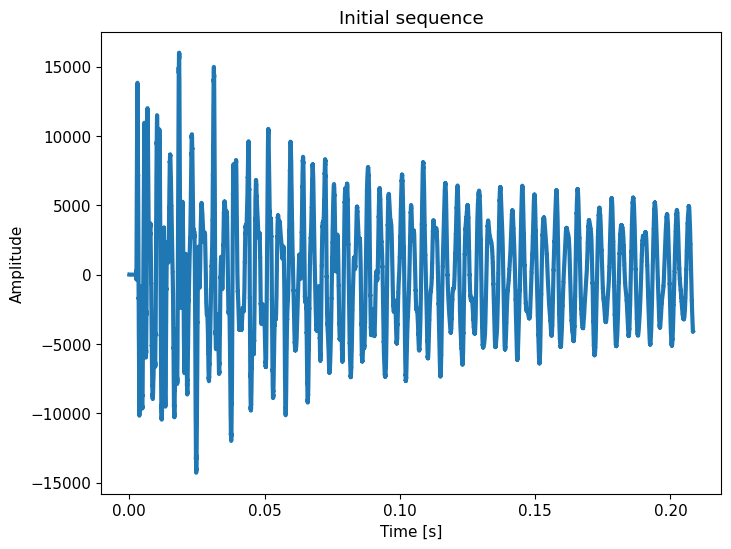

In [32]:
# visualize data
k = 10000    # visualize just k first elements
initial_time = np.linspace(0., initial_length, data.shape[0])
plt.plot(initial_time[:k], data[:k])
plt.xlabel("Time [s]")
plt.ylabel("Amplitude")
plt.title('Initial sequence')
plt.show()

In [33]:
model = AutoregressiveModel(data, 300)

INFO: Creating matrix (M)...
INFO: Looking for optimal parameters...
INFO: Successfully found optimal parameters for autoregressive model.
INFO: Total cost is 1496984.9851587573.
INFO: Model created.
INFO: Shape of given data (y): (67696,)
INFO: Model order (p): 300
INFO: Matrix shape (M): (67396, 300)
INFO: Parameters shape (a): (300,)


In [34]:
predicted_seq = model.ar_predict(data.shape[0])
length = predicted_seq.shape[0]/samplerate
print(f"INFO: Predicted audio length is {length:.02f}s")

INFO: Successfully predicted sequence of shape (67696,).
INFO: Predicted audio length is 1.41s


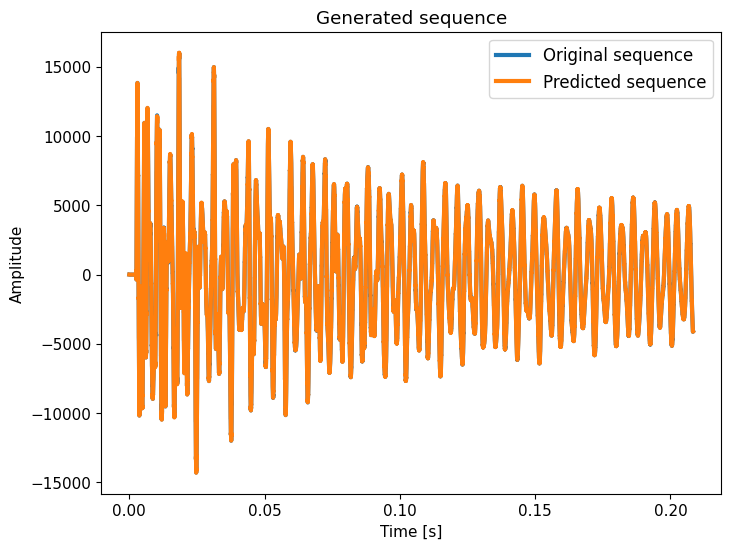

In [38]:
# plot predicted sequence
time = np.linspace(0., length, predicted_seq.shape[0])
plt.plot(initial_time[:k], data[:k], label='Original sequence')
plt.plot(time[:k], predicted_seq[:k], label='Predicted sequence')
plt.xlabel("Time [s]")
plt.ylabel("Amplitude")
plt.title('Generated sequence')
plt.legend()
plt.show()

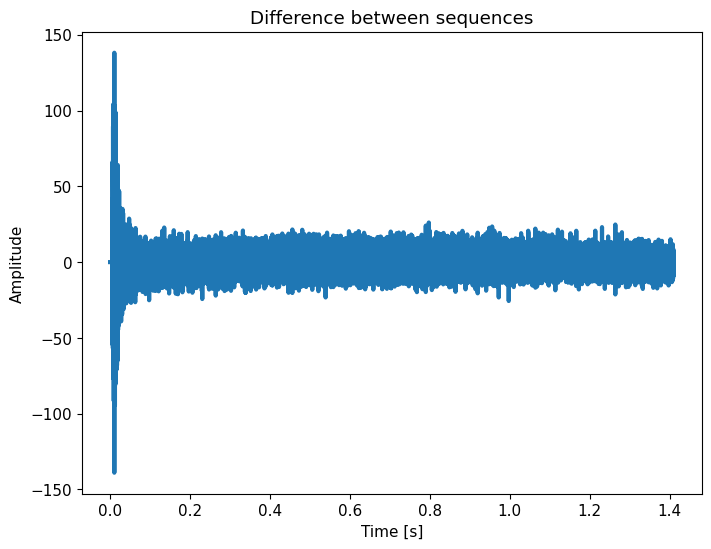

In [36]:
# plot the difference between initial audio file and generated sequence
if data.shape == predicted_seq.shape:
    plt.plot(time, data - predicted_seq)
    plt.xlabel("Time [s]")
    plt.ylabel("Amplitude")
    plt.title('Difference between sequences')
    plt.show()
else:
    print("ERROR: Shape of sequences doesn't match.")